# Pandas Learnings
10 mins tutorial content

In [3]:
import pandas as pd
import numpy as np

Object creation in Pandas

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [4]:
df=pd.Series([1,2,3,4,5,6,7,8])
df

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
dtype: int64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [5]:
dates=pd.date_range("20200201",periods=6)
dates

DatetimeIndex(['2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=list("ABCD"))
df

A         B         C         D
2020-02-01  2.212505  0.582702  0.178171  0.789600
2020-02-02  0.786713 -1.164037 -1.927600 -0.083895
2020-02-03  0.335310 -0.416886 -0.620040 -0.711484
2020-02-04  0.479770 -0.523725  1.432016  0.033962
2020-02-05 -0.614333  0.263739  1.071383 -0.997979
2020-02-06 -0.171083 -0.240813 -0.637784 -1.211224

In [7]:
np.random.randn(6,4)

array([[ 0.32094135,  0.98309191,  3.09411377, -1.56893925],
       [ 1.03163896, -2.22755213,  2.59480045, -0.78332082],
       [-0.29258039, -0.67638536,  0.59782434, -0.22405862],
       [-1.19912396,  0.21418521, -2.25496601,  0.54300079],
       [-0.37757157,  0.08365752, -0.78439234, -2.61975598],
       [ 0.08296901, -0.45666072,  0.51848339,  0.39056119]])

In [8]:
print(np.random.randn(6,4))

[[ 0.45908934  2.2628409  -1.41945565  0.31606455]
 [-0.57155348 -1.35229131 -0.36232962 -0.05118886]
 [ 0.27909333  0.18211374  0.78909142  0.97358948]
 [ 1.93018538  2.56794553 -0.63210418  0.39782417]
 [-1.45310809  1.49022287 -1.80629301  0.94820763]
 [ 0.78990751  1.07806432  0.01708654  0.02223839]]


In [9]:
series_index=pd.Series(["Person A","Person B","Person C","Person D","Person E"])
series_grade=pd.Series(["A","B","A","A","C"])
df=pd.DataFrame(np.random.randn(5,4),index=series_index,columns=["Persons","Subject 1","Subject 2","Subject 3"])
df

Persons  Subject 1  Subject 2  Subject 3
Person A  0.765830  -0.513229   0.399245  -0.066224
Person B  1.736127  -0.177190  -0.418288   0.481098
Person C -0.548556   0.130764  -0.114324  -0.425738
Person D  0.346643  -0.621566   1.068353  -0.591244
Person E -1.371688   0.391739  -0.892915   2.546680

Creating a DataFrame by passing a dict of objects that can be converted to series-like.


In [10]:
df2 = pd.DataFrame({
   ...:         "A": 1.0,
   ...:         "B": pd.Timestamp("20130102"),
   ...:         "C": pd.Series(1, index=list(range(4)), dtype="float32"),
   ...:         "D": np.array([3] * 4, dtype="int32"),
   ...:         "E": pd.Categorical(["test", "train", "test", "train"]),
   ...:         "F": "foo",
   ...:     }
   ...: )
df2

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [12]:
df.head()

Persons  Subject 1  Subject 2  Subject 3
Person A  0.765830  -0.513229   0.399245  -0.066224
Person B  1.736127  -0.177190  -0.418288   0.481098
Person C -0.548556   0.130764  -0.114324  -0.425738
Person D  0.346643  -0.621566   1.068353  -0.591244
Person E -1.371688   0.391739  -0.892915   2.546680

In [13]:
df.tail(2)

Persons  Subject 1  Subject 2  Subject 3
Person D  0.346643  -0.621566   1.068353  -0.591244
Person E -1.371688   0.391739  -0.892915   2.546680

In [14]:
df.index

Index(['Person A', 'Person B', 'Person C', 'Person D', 'Person E'], dtype='object')

In [15]:
df.columns

Index(['Persons', 'Subject 1', 'Subject 2', 'Subject 3'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data.
NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column.
When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

In [16]:
df.to_numpy()

array([[ 0.76582966, -0.51322906,  0.3992449 , -0.06622398],
       [ 1.7361272 , -0.17718964, -0.41828819,  0.48109791],
       [-0.54855648,  0.13076427, -0.11432365, -0.42573776],
       [ 0.34664264, -0.62156635,  1.06835291, -0.5912438 ],
       [-1.371688  ,  0.39173942, -0.89291477,  2.5466801 ]])

In [17]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [18]:
df.transpose()

Person A  Person B  Person C  Person D  Person E
Persons    0.765830  1.736127 -0.548556  0.346643 -1.371688
Subject 1 -0.513229 -0.177190  0.130764 -0.621566  0.391739
Subject 2  0.399245 -0.418288 -0.114324  1.068353 -0.892915
Subject 3 -0.066224  0.481098 -0.425738 -0.591244  2.546680

In [19]:
df.T

Person A  Person B  Person C  Person D  Person E
Persons    0.765830  1.736127 -0.548556  0.346643 -1.371688
Subject 1 -0.513229 -0.177190  0.130764 -0.621566  0.391739
Subject 2  0.399245 -0.418288 -0.114324  1.068353 -0.892915
Subject 3 -0.066224  0.481098 -0.425738 -0.591244  2.546680

In [20]:
df

Persons  Subject 1  Subject 2  Subject 3
Person A  0.765830  -0.513229   0.399245  -0.066224
Person B  1.736127  -0.177190  -0.418288   0.481098
Person C -0.548556   0.130764  -0.114324  -0.425738
Person D  0.346643  -0.621566   1.068353  -0.591244
Person E -1.371688   0.391739  -0.892915   2.546680

In [21]:
df.sort_index(axis=1, ascending=False)

Subject 3  Subject 2  Subject 1   Persons
Person A  -0.066224   0.399245  -0.513229  0.765830
Person B   0.481098  -0.418288  -0.177190  1.736127
Person C  -0.425738  -0.114324   0.130764 -0.548556
Person D  -0.591244   1.068353  -0.621566  0.346643
Person E   2.546680  -0.892915   0.391739 -1.371688

In [22]:
df.sort_values(by="Subject 3")

Persons  Subject 1  Subject 2  Subject 3
Person D  0.346643  -0.621566   1.068353  -0.591244
Person C -0.548556   0.130764  -0.114324  -0.425738
Person A  0.765830  -0.513229   0.399245  -0.066224
Person B  1.736127  -0.177190  -0.418288   0.481098
Person E -1.371688   0.391739  -0.892915   2.546680

Selecting in pandas

In [23]:
df["Persons"]

Person A    0.765830
Person B    1.736127
Person C   -0.548556
Person D    0.346643
Person E   -1.371688
Name: Persons, dtype: float64

In [24]:
df[0:2]

Persons  Subject 1  Subject 2  Subject 3
Person A  0.765830  -0.513229   0.399245  -0.066224
Person B  1.736127  -0.177190  -0.418288   0.481098

In [25]:
df2

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

In [26]:
df2.loc[:, ["A", "B"]]

A          B
0  1.0 2013-01-02
1  1.0 2013-01-02
2  1.0 2013-01-02
3  1.0 2013-01-02

In [27]:
df2.loc["20130102":"20130104", ["A", "B"]]

Empty DataFrame
Columns: [A, B]
Index: []

In [28]:
df.iloc[1]

Persons      1.736127
Subject 1   -0.177190
Subject 2   -0.418288
Subject 3    0.481098
Name: Person B, dtype: float64

In [29]:
df.iloc[3:5, 0:2]

Persons  Subject 1
Person D  0.346643  -0.621566
Person E -1.371688   0.391739

In [30]:
df.iloc[[1, 2, 4], [0, 2]]

Persons  Subject 2
Person B  1.736127  -0.418288
Person C -0.548556  -0.114324
Person E -1.371688  -0.892915

In [31]:
df[df["Subject 1"] > 0]

Persons  Subject 1  Subject 2  Subject 3
Person C -0.548556   0.130764  -0.114324  -0.425738
Person E -1.371688   0.391739  -0.892915   2.546680

In [32]:
df[df > 0]

Persons  Subject 1  Subject 2  Subject 3
Person A  0.765830        NaN   0.399245        NaN
Person B  1.736127        NaN        NaN   0.481098
Person C       NaN   0.130764        NaN        NaN
Person D  0.346643        NaN   1.068353        NaN
Person E       NaN   0.391739        NaN   2.546680

In [33]:
df2[df2["E"].isin(["two", "four"])]


Empty DataFrame
Columns: [A, B, C, D, E, F]
Index: []

In [34]:
df2

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

In [35]:
df

Persons  Subject 1  Subject 2  Subject 3
Person A  0.765830  -0.513229   0.399245  -0.066224
Person B  1.736127  -0.177190  -0.418288   0.481098
Person C -0.548556   0.130764  -0.114324  -0.425738
Person D  0.346643  -0.621566   1.068353  -0.591244
Person E -1.371688   0.391739  -0.892915   2.546680

In [36]:
df["Subject 3"]

Person A   -0.066224
Person B    0.481098
Person C   -0.425738
Person D   -0.591244
Person E    2.546680
Name: Subject 3, dtype: float64

In [37]:
df["Grade"]=["A","B","A","C","A"]
df

Persons  Subject 1  Subject 2  Subject 3 Grade
Person A  0.765830  -0.513229   0.399245  -0.066224     A
Person B  1.736127  -0.177190  -0.418288   0.481098     B
Person C -0.548556   0.130764  -0.114324  -0.425738     A
Person D  0.346643  -0.621566   1.068353  -0.591244     C
Person E -1.371688   0.391739  -0.892915   2.546680     A

isin() method used for filtering

In [38]:
df[df["Grade"].isin(["A", "B"])]

Persons  Subject 1  Subject 2  Subject 3 Grade
Person A  0.765830  -0.513229   0.399245  -0.066224     A
Person B  1.736127  -0.177190  -0.418288   0.481098     B
Person C -0.548556   0.130764  -0.114324  -0.425738     A
Person E -1.371688   0.391739  -0.892915   2.546680     A

Setting values by label

In [39]:
 df.at[dates[0], "A"] = 0

In [40]:
df

Persons  Subject 1  Subject 2  Subject 3 Grade    A
Person A             0.765830  -0.513229   0.399245  -0.066224     A  NaN
Person B             1.736127  -0.177190  -0.418288   0.481098     B  NaN
Person C            -0.548556   0.130764  -0.114324  -0.425738     A  NaN
Person D             0.346643  -0.621566   1.068353  -0.591244     C  NaN
Person E            -1.371688   0.391739  -0.892915   2.546680     A  NaN
2020-02-01 00:00:00       NaN        NaN        NaN        NaN   NaN  0.0

In [41]:
df3=df.copy()  #To copy one datafram to another
df3

Persons  Subject 1  Subject 2  Subject 3 Grade    A
Person A             0.765830  -0.513229   0.399245  -0.066224     A  NaN
Person B             1.736127  -0.177190  -0.418288   0.481098     B  NaN
Person C            -0.548556   0.130764  -0.114324  -0.425738     A  NaN
Person D             0.346643  -0.621566   1.068353  -0.591244     C  NaN
Person E            -1.371688   0.391739  -0.892915   2.546680     A  NaN
2020-02-01 00:00:00       NaN        NaN        NaN        NaN   NaN  0.0

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1

Persons  Subject 1  Subject 2  Subject 3 Grade    A   E
2020-02-01      NaN        NaN        NaN        NaN   NaN  0.0 NaN
2020-02-02      NaN        NaN        NaN        NaN   NaN  NaN NaN
2020-02-03      NaN        NaN        NaN        NaN   NaN  NaN NaN
2020-02-04      NaN        NaN        NaN        NaN   NaN  NaN NaN

To drop any rows that have missing data use dropna() method

In [44]:
df1.dropna(how="any")

Empty DataFrame
Columns: [Persons, Subject 1, Subject 2, Subject 3, Grade, A, E]
Index: []

To fill missing data use fillna() method

In [52]:
df1.fillna(value=5)
df3=df1.fillna(value=10)

To get the boolean mask where values are nan we use the isna() method

In [53]:
pd.isna(df1)

Persons  Subject 1  Subject 2  Subject 3  Grade      A     E
2020-02-01     True       True       True       True   True  False  True
2020-02-02     True       True       True       True   True   True  True
2020-02-03     True       True       True       True   True   True  True
2020-02-04     True       True       True       True   True   True  True

In [54]:
pd.isna(df3)

Persons  Subject 1  Subject 2  Subject 3  Grade      A      E
2020-02-01    False      False      False      False  False  False  False
2020-02-02    False      False      False      False  False  False  False
2020-02-03    False      False      False      False  False  False  False
2020-02-04    False      False      False      False  False  False  False

In [55]:
df2 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
pd.isna(df2)

Persons  Subject 1  Subject 2  Subject 3  Grade      A     E
2020-02-01     True       True       True       True   True  False  True
2020-02-02     True       True       True       True   True   True  True
2020-02-03     True       True       True       True   True   True  True
2020-02-04     True       True       True       True   True   True  True

In [56]:
df2

Persons  Subject 1  Subject 2  Subject 3 Grade    A   E
2020-02-01      NaN        NaN        NaN        NaN   NaN  0.0 NaN
2020-02-02      NaN        NaN        NaN        NaN   NaN  NaN NaN
2020-02-03      NaN        NaN        NaN        NaN   NaN  NaN NaN
2020-02-04      NaN        NaN        NaN        NaN   NaN  NaN NaN

In [57]:
df.mean()

Persons      0.185671
Subject 1   -0.157896
Subject 2    0.008414
Subject 3    0.388914
A            0.000000
dtype: float64

In [58]:
df.mean(1)

Person A               0.146405
Person B               0.405437
Person C              -0.239463
Person D               0.050546
Person E               0.168454
2020-02-01 00:00:00    0.000000
dtype: float64

To apply functions to data we can use the apply() method

In [63]:
df3.apply(np.cumsum)

Persons  Subject 1  Subject 2  Subject 3  Grade     A     E
2020-02-01     10.0       10.0       10.0       10.0     10   0.0  10.0
2020-02-02     20.0       20.0       20.0       20.0     20  10.0  20.0
2020-02-03     30.0       30.0       30.0       30.0     30  20.0  30.0
2020-02-04     40.0       40.0       40.0       40.0     40  30.0  40.0

In [64]:
df3.apply(lambda x: x.max()-x.min())

Persons       0.0
Subject 1     0.0
Subject 2     0.0
Subject 3     0.0
Grade         0.0
A            10.0
E             0.0
dtype: float64

Histogrammings the data in a series

In [68]:
myseris=pd.Series(np.random.randn(7))
myseris

0    0.570466
1    0.719091
2    0.617654
3   -1.318744
4   -1.399916
5   -0.122030
6    0.058727
dtype: float64

In [69]:
myseries=pd.Series(np.random.randint(0,7,size=10))
myseries

0    0
1    6
2    0
3    0
4    4
5    6
6    2
7    1
8    0
9    3
dtype: int64

In [71]:
myseries.value_counts() #To count the number of times the values occured in the above seies

0    4
6    2
1    1
2    1
3    1
4    1
dtype: int64

We can also use string methods

In [72]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

Merging series in a dataframe

In [74]:
df = pd.DataFrame(np.random.randn(10, 4))
df

0         1         2         3
0  0.543004  1.594798  0.915319 -1.044090
1 -1.547285 -0.309654  0.460319 -0.481939
2 -0.555572 -1.283660  1.592139 -1.277425
3 -1.266490  0.420521 -0.517687  0.844973
4  0.498860 -1.118942 -0.539914 -1.138289
5  0.977717 -1.078705 -1.394654  0.156041
6 -2.005051  1.077914 -1.122144  2.819499
7  0.296670  0.601179  0.302545 -1.552246
8  0.601832  0.555346 -0.345776 -0.317246
9  0.691751 -0.949218 -0.495462  0.484419

In [77]:
pieces = [df[:3], df[3:7], df[7:]] #Here we are slicing the columns and rows, i.e, breaking the data frame into pieces
pieces

[          0         1         2         3
 0  0.543004  1.594798  0.915319 -1.044090
 1 -1.547285 -0.309654  0.460319 -0.481939
 2 -0.555572 -1.283660  1.592139 -1.277425,
           0         1         2         3
 3 -1.266490  0.420521 -0.517687  0.844973
 4  0.498860 -1.118942 -0.539914 -1.138289
 5  0.977717 -1.078705 -1.394654  0.156041
 6 -2.005051  1.077914 -1.122144  2.819499,
           0         1         2         3
 7  0.296670  0.601179  0.302545 -1.552246
 8  0.601832  0.555346 -0.345776 -0.317246
 9  0.691751 -0.949218 -0.495462  0.484419]

In [78]:
pd.concat(pieces) #Finally concatinating it all

0         1         2         3
0  0.543004  1.594798  0.915319 -1.044090
1 -1.547285 -0.309654  0.460319 -0.481939
2 -0.555572 -1.283660  1.592139 -1.277425
3 -1.266490  0.420521 -0.517687  0.844973
4  0.498860 -1.118942 -0.539914 -1.138289
5  0.977717 -1.078705 -1.394654  0.156041
6 -2.005051  1.077914 -1.122144  2.819499
7  0.296670  0.601179  0.302545 -1.552246
8  0.601832  0.555346 -0.345776 -0.317246
9  0.691751 -0.949218 -0.495462  0.484419

Note: Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. It is recommended to pass a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it

We can join 2 dataframes using the merge() method

In [79]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
left

key  lval
0  foo     1
1  foo     2

In [80]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
right

key  rval
0  foo     4
1  foo     5

In [81]:
pd.merge(left, right, on="key") #merging the 2 dataframes here

key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

Grouping in Padas

In [82]:
df = pd.DataFrame(
   ....:     {
   ....:         "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
   ....:         "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
   ....:         "C": np.random.randn(8),
   ....:         "D": np.random.randn(8),
   ....:     }
   ....: )
df

A      B         C         D
0  foo    one  0.329455 -0.907480
1  bar    one  0.345516 -0.024211
2  foo    two -0.399073 -0.325896
3  bar  three -0.066323  0.110604
4  foo    two -0.449223 -0.528341
5  bar    two -0.936228  1.062892
6  foo    one  0.833170  0.192583
7  foo  three -0.635460  0.437250

In [83]:
df.groupby("A").sum()

C         D
A                      
bar -0.657034  1.149285
foo -0.321131 -1.131885

In [84]:
df.groupby(["A","B"]).sum()

C         D
A   B                        
bar one    0.345516 -0.024211
    three -0.066323  0.110604
    two   -0.936228  1.062892
foo one    1.162626 -0.714898
    three -0.635460  0.437250
    two   -0.848297 -0.854237

Reshaping - Stacking
The stack() method “compresses” a level in the DataFrame’s columns.

Not related to pandas but in python the zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.

If the passed iterators have different lengths, the iterator with the least items decides the length of the new iterator.

In [87]:
tuples = list(
   ....:     zip(
   ....:         *[
   ....:             ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ....:             ["one", "two", "one", "two", "one", "two", "one", "two"],
   ....:         ]
   ....:     )
   ....: )
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [88]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [90]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one     0.322111 -0.071399
      two     1.018823  0.467834
baz   one    -0.189305 -1.385195
      two    -0.527841  0.131758
foo   one    -0.030399  0.928344
      two     0.243422 -0.996022
qux   one    -0.778513  0.493537
      two    -0.554267  0.631438

In [91]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.322111 -0.071399
      two     1.018823  0.467834
baz   one    -0.189305 -1.385195
      two    -0.527841  0.131758

In [92]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.322111
               B   -0.071399
       two     A    1.018823
               B    0.467834
baz    one     A   -0.189305
               B   -1.385195
       two     A   -0.527841
               B    0.131758
dtype: float64

In [93]:
stacked.unstack()

A         B
first second                    
bar   one     0.322111 -0.071399
      two     1.018823  0.467834
baz   one    -0.189305 -1.385195
      two    -0.527841  0.131758

In [94]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.322111  1.018823
      B -0.071399  0.467834
baz   A -0.189305 -0.527841
      B -1.385195  0.131758

In [95]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.322111 -0.189305
       B -0.071399 -1.385195
two    A  1.018823 -0.527841
       B  0.467834  0.131758

In [96]:
df = pd.DataFrame(
   .....:     {
   .....:         "A": ["one", "one", "two", "three"] * 3,
   .....:         "B": ["A", "B", "C"] * 4,
   .....:         "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
   .....:         "D": np.random.randn(12),
   .....:         "E": np.random.randn(12),
   .....:     }
   .....: )
df

A  B    C         D         E
0     one  A  foo -0.586301 -0.226364
1     one  B  foo  1.164230  1.967406
2     two  C  foo  0.210354 -0.807892
3   three  A  bar  2.261337  0.499265
4     one  B  bar  0.592503 -0.678119
5     one  C  bar  1.192501 -0.074851
6     two  A  foo  0.102377 -1.235345
7   three  B  foo -0.969350  0.935010
8     one  C  foo -0.630032  0.797984
9     one  A  bar  0.835611 -0.076527
10    two  B  bar  1.554706 -1.037760
11  three  C  bar -0.145812 -0.571586

Pivot Tables can be produced from this data

In [97]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.835611 -0.586301
      B  0.592503  1.164230
      C  1.192501 -0.630032
three A  2.261337       NaN
      B       NaN -0.969350
      C -0.145812       NaN
two   A       NaN  0.102377
      B  1.554706       NaN
      C       NaN  0.210354

Time Series data
Pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications

In [99]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [100]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    422
2012-01-01 00:00:01    152
2012-01-01 00:00:02    300
2012-01-01 00:00:03     57
2012-01-01 00:00:04     66
                      ... 
2012-01-01 00:01:35    202
2012-01-01 00:01:36     95
2012-01-01 00:01:37    453
2012-01-01 00:01:38    141
2012-01-01 00:01:39    133
Freq: S, Length: 100, dtype: int64

In [101]:
ts.resample("5Min").sum()

2012-01-01    22533
Freq: 5T, dtype: int64

Plotting
Plot the data using matplotlib

In [103]:
import matplotlib.pyplot as plt
plt.close("all")

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

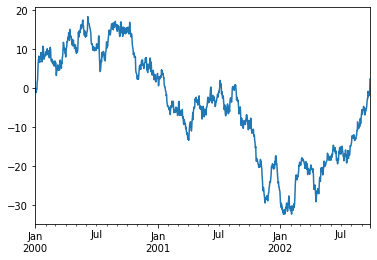

In [104]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

Reading and writing from files can be done using the methods()
df.to_csv("foo.csv")
and 
pd.read_csv("foo.csv")